In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
#importing needed libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
%matplotlib inline

In [3]:
#display all columns
pd.set_option('display.max_columns',None)

In [4]:
#loading dataset
df= pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
# to clear and free up space in memory
import gc
gc.collect()

26

In [6]:
#inspecting dataframe
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
#inspecting dataframe
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [8]:
#a sample of the dataframe
df.sample()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
270582,7310143429,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,29500,1997.0,mitsubishi,3000gt vr-4,like new,6 cylinders,gas,34270.0,clean,manual,NaN,4wd,NaN,coupe,green,https://images.craigslist.org/00s0s_lj2XaIcATW...,For sale is my 1997 Mitsubishi 3000GT VR-4 wit...,NaN,ny,41.3945,-73.9737,2021-04-20T21:08:38-0400


In [9]:
#checking the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:
#statistical description of the data frame
df.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,5,NaN,6,3,118264,3,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://phoenix.craigslist.org/nph/ctd/d/phoen...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [11]:
#checking the dimension of the dataframe
df.shape

(426880, 26)

## **Data Preprocessing**

### Checking for and fill up missing values in the dataset

In [12]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [13]:
df.url.unique()

array(['https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html',
       'https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html',
       'https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html',
       ...,
       'https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt4-sport/7301591147.html',
       'https://wyoming.craigslist.org/ctd/d/atlanta-2018-lexus-es-es-350-sedan-4d/7301591140.html',
       'https://wyoming.craigslist.org/ctd/d/atlanta-2019-bmw-series-430i-gran-coupe/7301591129.html'],
      dtype=object)

### some of the missing information can be found in the url column. Information such as manufacturer,year and type can be extracted from the url column.

### New columns will be created from it(url column) and put in a new dataframe called df2 to avoid congesting the original dataframe

In [14]:
#splitting the url column to extract needed information from it
import urllib
df2 = pd.DataFrame()
urls=df['url']
df2['protocol'],df2['domain'],df2['path'],df2['query'],df2['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

In [15]:
#removing unwanted characters from the path column
import re
df2['path']=df2['path'].map(lambda x: re.sub(r'\W+', ' ', x))
df2

,protocol,domain,path,query,fragment
0,https,prescott.craigslist.org,cto d prescott 2010 ford ranger 7222695916 html,,
1,https,fayar.craigslist.org,ctd d bentonville 2017 hyundai elantra se 721...,,
2,https,keys.craigslist.org,cto d summerland key 2005 excursion 722179793...,,
3,https,worcester.craigslist.org,cto d west brookfield 2002 honda odyssey ex 7...,,
4,https,greensboro.craigslist.org,cto d trinity 1965 chevrolet truck 7210384030...,,
...,...,...,...,...,...
426875,https,wyoming.craigslist.org,ctd d atlanta 2019 nissan maxima sedan 4d 730...,,
426876,https,wyoming.craigslist.org,ctd d atlanta 2020 volvo s60 t5 momentum 7301...,,
426877,https,wyoming.craigslist.org,ctd d atlanta 2020 caddy cadillac xt4 sport 7...,,
426878,https,wyoming.craigslist.org,ctd d atlanta 2018 lexus es es 350 sedan 4d 7...,,


In [16]:
#dropping query and fragment column since they are empty
df2.drop(['query', 'fragment'], axis = 1, inplace=True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   protocol  426880 non-null  object
 1   domain    426880 non-null  object
 2   path      426880 non-null  object
dtypes: object(3)
memory usage: 9.8+ MB


In [18]:
gc.collect()

88

### Since the path column in the new dataframe df2 contains a mixture of characters, we will be extracting all numeric characters from it and putting them in a new column called path_int

In [19]:
#compile all alphabets 
replace = re.compile("([a-zA-Z]+)")
#extracting numeric values and removing trailing white spaces
df2['path_int']= df2['path'].str.replace(replace, " ").str.strip()

In [20]:
df2.path_int

0                    2010     7222695916
1                  2017       7218891961
2                      2005   7221797935
3                  2002       7222270760
4                    1965     7210384030
                       ...              
426875          2019       4  7301591192
426876        2020    60  5   7301591187
426877          2020      4   7301591147
426878    2018       350   4  7301591140
426879      2019     430      7301591129
Name: path_int, Length: 426880, dtype: object

### Noticed not all numeric values contain year details in the path_int column. Will be extracting the year details by filtering the path_int column using the function defined below

In [21]:
#a function for filtering the path_int column
def checkvar(x):
    s = str(x)
    first_d = int(s[0])
    if first_d == 1 or first_d == 2:
        return s
    else:
        return 0

### Applying the function above to the path_int column and putting the filtered values in a new column called pa_th as shown below. This new column will contain values starting with 1 or 2 and return 0 for path_int values starting with number greater than 2

In [22]:
#creating a new column that will contain year values starting with 1 and those starting with 2
df2['pa_th'] = df2['path_int'].dropna().apply(checkvar)
df2['pa_th']

0                    2010     7222695916
1                  2017       7218891961
2                      2005   7221797935
3                  2002       7222270760
4                    1965     7210384030
                       ...              
426875          2019       4  7301591192
426876        2020    60  5   7301591187
426877          2020      4   7301591147
426878    2018       350   4  7301591140
426879      2019     430      7301591129
Name: pa_th, Length: 426880, dtype: object

### creating a new column called year that contains only the first four values filtered from the pa_th column

In [23]:
#extracting the first four values from the path_int column representing the year
df2['year']=df2['pa_th'].dropna().str[:4]
df2['year'].unique()

array(['2010', '2017', '2005', '2002', '1965', '2007', '2000', '2015',
       '2012', '2011', '2013', '2019', '2016', nan, '2014', '2020',
       '1992', '2018', '2004', '2001', '2006', '1800', '2008', '1966',
       '2009', '1998', '1999', '2021', '1997', '1976', '2003', '1969',
       '1995', '1978', '1954', '1   ', '1970', '1929', '1996', '1955',
       '1960', '1991', '1972', '250 ', '1988', '1994', '1500', '1968',
       '150 ', '2500', '200 ', '1979', '1986', '1989', '1973', '1946',
       '1933', '1958', '1937', '1985', '1957', '1953', '1963', '1987',
       '1977', '1903', '100 ', '1990', '20  ', '1982', '1948', '1974',
       '10  ', '1983', '1936', '1934', '1951', '1984', '13  ', '180 ',
       '1931', '1980', '12  ', '11  ', '1967', '101 ', '1971', '1947',
       '1981', '25 4', '1926', '1962', '2  7', '230 ', '1993', '1964',
       '14  ', '1952', '124 ', '19  ', '1975', '225 ', '1940', '20 4',
       '1959', '1923', '1950', '1922', '1928', '1000', '299 ', '1941',
       '1

### There are numbers that are not exactly year values,they will be replaced with 0. Any number less than 1900 or greater than 2021 are returned as zero. 

In [24]:
#removing whitespaces
df2['year'] = df2['year'].str.replace(" ","")

In [25]:
#converting year type to float to be able to perform required data manipulation
df2['year']=df2['year'].astype(float)



In [26]:
#choosing only range of values that are reasonable year values
df2.loc[~df2.year.between(1899, 2022), "year"] = 0

In [27]:
df2['year'].unique()

array([2010., 2017., 2005., 2002., 1965., 2007., 2000., 2015., 2012.,
       2011., 2013., 2019., 2016.,    0., 2014., 2020., 1992., 2018.,
       2004., 2001., 2006., 2008., 1966., 2009., 1998., 1999., 2021.,
       1997., 1976., 2003., 1969., 1995., 1978., 1954., 1970., 1929.,
       1996., 1955., 1960., 1991., 1972., 1988., 1994., 1968., 1979.,
       1986., 1989., 1973., 1946., 1933., 1958., 1937., 1985., 1957.,
       1953., 1963., 1987., 1977., 1903., 1990., 1982., 1948., 1974.,
       1983., 1936., 1934., 1951., 1984., 1931., 1980., 1967., 1971.,
       1947., 1981., 1926., 1962., 1993., 1964., 1952., 1975., 1940.,
       1959., 1923., 1950., 1922., 1928., 1941., 1932., 1956., 1924.,
       1927., 1939., 1942., 1949., 1961., 1935., 1918., 1930., 2022.,
       1938., 1913., 1916., 1943., 1899., 1925., 1921., 1915., 1945.,
       1917., 1901., 1920., 1944., 1900., 1910.])

### there are now actual year values in the new column. Next, will be filling missing year values in the original dataframe with the new year values in the second dataframe based on matching ids. 

In [28]:
#creating a matching id column for new dataframe
df2['id']=df['id']
df2

,protocol,domain,path,path_int,pa_th,year,id
0,https,prescott.craigslist.org,cto d prescott 2010 ford ranger 7222695916 html,2010 7222695916,2010 7222695916,2010.0,7222695916
1,https,fayar.craigslist.org,ctd d bentonville 2017 hyundai elantra se 721...,2017 7218891961,2017 7218891961,2017.0,7218891961
2,https,keys.craigslist.org,cto d summerland key 2005 excursion 722179793...,2005 7221797935,2005 7221797935,2005.0,7221797935
3,https,worcester.craigslist.org,cto d west brookfield 2002 honda odyssey ex 7...,2002 7222270760,2002 7222270760,2002.0,7222270760
4,https,greensboro.craigslist.org,cto d trinity 1965 chevrolet truck 7210384030...,1965 7210384030,1965 7210384030,1965.0,7210384030
...,...,...,...,...,...,...,...
426875,https,wyoming.craigslist.org,ctd d atlanta 2019 nissan maxima sedan 4d 730...,2019 4 7301591192,2019 4 7301591192,2019.0,7301591192
426876,https,wyoming.craigslist.org,ctd d atlanta 2020 volvo s60 t5 momentum 7301...,2020 60 5 7301591187,2020 60 5 7301591187,2020.0,7301591187
426877,https,wyoming.craigslist.org,ctd d atlanta 2020 caddy cadillac xt4 sport 7...,2020 4 7301591147,2020 4 7301591147,2020.0,7301591147
426878,https,wyoming.craigslist.org,ctd d atlanta 2018 lexus es es 350 sedan 4d 7...,2018 350 4 7301591140,2018 350 4 7301591140,2018.0,7301591140


In [29]:
#fill missing values in the first dataframe year column with actual values from the other dataframe based on ID
df['year']=df.set_index('id')['year'].fillna(df2.set_index('id')['year']).values

In [30]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,1965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


### The year column in the original dataframe has been filled

In [31]:
gc.collect()

255

### MANUFACTURER

#### Filling the Manufacturer column

#### First of all, we check for unique values in the manfacturer column from the original dataframe

In [32]:
#checking out unique values for the manufacturer columns
df.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

#### Next we create a list for these unique values. They are then extracted from the path column in the new dataframe(df2) and put into a new column called 'manu'

In [33]:
#extracting manufacturer from path column
L = '|'.join(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'])
#creating a new column containing the names of each manufacturer found in the path column
df2['manu'] = df2['path'].str.extract('('+ L + ')', expand=False, flags=re.I)
df2

,protocol,domain,path,path_int,pa_th,year,id,manu
0,https,prescott.craigslist.org,cto d prescott 2010 ford ranger 7222695916 html,2010 7222695916,2010 7222695916,2010.0,7222695916,ford
1,https,fayar.craigslist.org,ctd d bentonville 2017 hyundai elantra se 721...,2017 7218891961,2017 7218891961,2017.0,7218891961,hyundai
2,https,keys.craigslist.org,cto d summerland key 2005 excursion 722179793...,2005 7221797935,2005 7221797935,2005.0,7221797935,NaN
3,https,worcester.craigslist.org,cto d west brookfield 2002 honda odyssey ex 7...,2002 7222270760,2002 7222270760,2002.0,7222270760,honda
4,https,greensboro.craigslist.org,cto d trinity 1965 chevrolet truck 7210384030...,1965 7210384030,1965 7210384030,1965.0,7210384030,chevrolet
...,...,...,...,...,...,...,...,...
426875,https,wyoming.craigslist.org,ctd d atlanta 2019 nissan maxima sedan 4d 730...,2019 4 7301591192,2019 4 7301591192,2019.0,7301591192,nissan
426876,https,wyoming.craigslist.org,ctd d atlanta 2020 volvo s60 t5 momentum 7301...,2020 60 5 7301591187,2020 60 5 7301591187,2020.0,7301591187,volvo
426877,https,wyoming.craigslist.org,ctd d atlanta 2020 caddy cadillac xt4 sport 7...,2020 4 7301591147,2020 4 7301591147,2020.0,7301591147,cadillac
426878,https,wyoming.craigslist.org,ctd d atlanta 2018 lexus es es 350 sedan 4d 7...,2018 350 4 7301591140,2018 350 4 7301591140,2018.0,7301591140,lexus


In [34]:
gc.collect()

22

#### We check to see if the path column contains the manufaturer detail for all rows

In [35]:
#checking if the path column contains the manufacturer details for all rows
df2.path.str.contains(L)

0          True
1          True
2         False
3          True
4          True
          ...  
426875     True
426876     True
426877     True
426878     True
426879     True
Name: path, Length: 426880, dtype: bool

#### False value shows that the manufacturer details are missing for a particular row. Hence we fill this with the most occured value

In [36]:
#fill the nan values in the new manu column with the mode
df2['manu']=df2['manu'].fillna('ford')
df2

,protocol,domain,path,path_int,pa_th,year,id,manu
0,https,prescott.craigslist.org,cto d prescott 2010 ford ranger 7222695916 html,2010 7222695916,2010 7222695916,2010.0,7222695916,ford
1,https,fayar.craigslist.org,ctd d bentonville 2017 hyundai elantra se 721...,2017 7218891961,2017 7218891961,2017.0,7218891961,hyundai
2,https,keys.craigslist.org,cto d summerland key 2005 excursion 722179793...,2005 7221797935,2005 7221797935,2005.0,7221797935,ford
3,https,worcester.craigslist.org,cto d west brookfield 2002 honda odyssey ex 7...,2002 7222270760,2002 7222270760,2002.0,7222270760,honda
4,https,greensboro.craigslist.org,cto d trinity 1965 chevrolet truck 7210384030...,1965 7210384030,1965 7210384030,1965.0,7210384030,chevrolet
...,...,...,...,...,...,...,...,...
426875,https,wyoming.craigslist.org,ctd d atlanta 2019 nissan maxima sedan 4d 730...,2019 4 7301591192,2019 4 7301591192,2019.0,7301591192,nissan
426876,https,wyoming.craigslist.org,ctd d atlanta 2020 volvo s60 t5 momentum 7301...,2020 60 5 7301591187,2020 60 5 7301591187,2020.0,7301591187,volvo
426877,https,wyoming.craigslist.org,ctd d atlanta 2020 caddy cadillac xt4 sport 7...,2020 4 7301591147,2020 4 7301591147,2020.0,7301591147,cadillac
426878,https,wyoming.craigslist.org,ctd d atlanta 2018 lexus es es 350 sedan 4d 7...,2018 350 4 7301591140,2018 350 4 7301591140,2018.0,7301591140,lexus


### Next we fill nan values in the manufacturer column in the original dataframe with values from the new dataframe based on mactching ids

In [37]:
#replacing missing values in the manufacturer column in the first dataframe with actual values in df2
df['manufacturer']=df.set_index('id')['manufacturer'].fillna(df2.set_index('id')['manu']).values

In [38]:
#inspecting dataframe
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,2010.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,2017.0,hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,2005.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,2002.0,honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,1965.0,chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


### The manufacturer column has been filled

In [39]:
gc.collect()

80

#### TYPE

#### Filling the type column

#### First of all, we check for unique values in the type column from the original dataframe

In [40]:
#checking for unique car types
df['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

#### Next we create a list for these unique values. They are then extracted from the path column in the new dataframe(df2) and put into a new column called 'type'

In [41]:
#creating a list for the car types
T= '|'.join(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'])
#extracting the types from the path column and putting them in a new column
df2['type'] = df2['path'].str.extract('('+ T + ')', expand=False, flags=re.I)
df2

,protocol,domain,path,path_int,pa_th,year,id,manu,type
0,https,prescott.craigslist.org,cto d prescott 2010 ford ranger 7222695916 html,2010 7222695916,2010 7222695916,2010.0,7222695916,ford,NaN
1,https,fayar.craigslist.org,ctd d bentonville 2017 hyundai elantra se 721...,2017 7218891961,2017 7218891961,2017.0,7218891961,hyundai,NaN
2,https,keys.craigslist.org,cto d summerland key 2005 excursion 722179793...,2005 7221797935,2005 7221797935,2005.0,7221797935,ford,NaN
3,https,worcester.craigslist.org,cto d west brookfield 2002 honda odyssey ex 7...,2002 7222270760,2002 7222270760,2002.0,7222270760,honda,NaN
4,https,greensboro.craigslist.org,cto d trinity 1965 chevrolet truck 7210384030...,1965 7210384030,1965 7210384030,1965.0,7210384030,chevrolet,truck
...,...,...,...,...,...,...,...,...,...
426875,https,wyoming.craigslist.org,ctd d atlanta 2019 nissan maxima sedan 4d 730...,2019 4 7301591192,2019 4 7301591192,2019.0,7301591192,nissan,sedan
426876,https,wyoming.craigslist.org,ctd d atlanta 2020 volvo s60 t5 momentum 7301...,2020 60 5 7301591187,2020 60 5 7301591187,2020.0,7301591187,volvo,NaN
426877,https,wyoming.craigslist.org,ctd d atlanta 2020 caddy cadillac xt4 sport 7...,2020 4 7301591147,2020 4 7301591147,2020.0,7301591147,cadillac,NaN
426878,https,wyoming.craigslist.org,ctd d atlanta 2018 lexus es es 350 sedan 4d 7...,2018 350 4 7301591140,2018 350 4 7301591140,2018.0,7301591140,lexus,sedan


### There are still some missing values in the new type column. This missing valued are then filled with the most occuring car type in the type column

In [42]:
#filling nan values with the mode
df2['type']=df2['type'].fillna('sedan')

### Next we fill nan values in the type column in the original dataframe with values from the new type column in the second dataframe based on mactching ids

In [43]:
#filling the original dataframe type column with corresponding values from the second dataframe based on ID
df['type']=df.set_index('id')['type'].fillna(df2.set_index('id')['type']).values

df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,2010.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sedan,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,2017.0,hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sedan,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,2005.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sedan,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,2002.0,honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sedan,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,1965.0,chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [44]:
#checking for the remaining null values
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type                 0
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [45]:
gc.collect()

102

### Further cleaning 

### since the vin is specific to each car, will fill missing values with '-' while filling the rest of the categorical variables with the mode

In [46]:
df['VIN']=df['VIN'].fillna('-')

### filling nan values in the remaining categorical variables with the most occuring value

In [47]:
#fill categorical variables with the mode
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [48]:
gc.collect()

22

### ODOMETER

<AxesSubplot:>

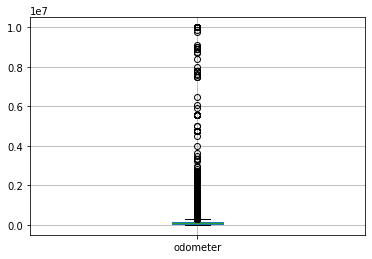

In [49]:
#checking the odometer column to see what measure of central tendency will be best to fill it
df.boxplot(column=['odometer'])

### There are so many outliers in the odometer column and a number of extreme values. It will be best to fill nan with the median

### Next, the posting date column is filled too

In [50]:
#filling the odometer with the median value
df['odometer'].fillna(df['odometer'].median(), inplace= True)
#filling posting date with not specified
df['posting_date'].fillna('not specified', inplace= True)

### odometer and posting dates have been filled. we move next to the lat and long column

In [51]:
#creating new columns for the lat and long values with the last non NaN value
df['lat_shift'] = df['lat'].shift()
df['lat_shift'] = df['lat_shift'].fillna(method='ffill')
df['long_shift']= df['long'].shift()
df['long_shift']= df['long_shift'].fillna(method='ffill')

In [52]:
# creating new metric
df['lat_new'] = df['lat_shift'] + (df['lat'] - df['lat_shift'])/2
df['long_new'] = df['long_shift'] + (df['long'] - df['long_shift'])/2

In [53]:
#filling Nan Values
df.loc[pd.isnull(df['lat']), 'lat'] = df['lat_new'].fillna(method='bfill')
df.loc[pd.isnull(df['long']), 'long'] = df['long'].fillna(method='bfill')

In [54]:
#dropping imputed columns with nan values and the county column 
df.drop(columns=['lat_shift', 'lat_new','long_shift','long_new','county'], inplace=True)

### The county column is dropped along side all the new columns created in the original dataframe since the state and region column are sufficient for analysis

In [55]:
gc.collect()

171

In [56]:
df.isna().sum()

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

### There are no missing values left in the dataset. The dataset is now clean

## Exploratory Data Analysis

#### Visualisations on numerical variables

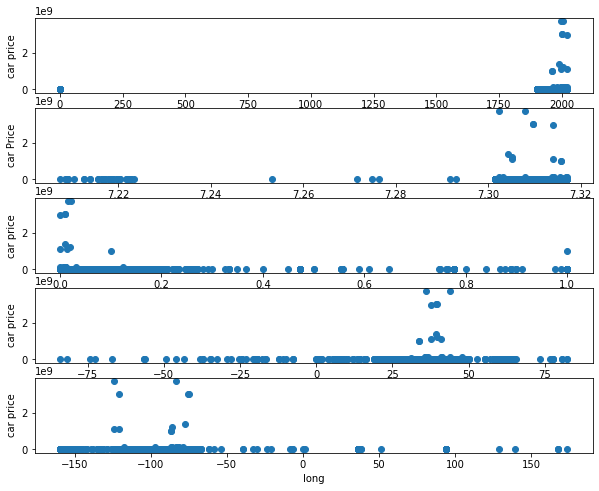

In [57]:
#scatter plots
fig, ax = plt.subplots(5, figsize=(10, 8))
ax[0].scatter(x = df['year'], y = df['price'])
ax[0].set_xlabel("year")
ax[0].set_ylabel("car price")

ax[1].scatter(x = df['id'], y = df['price'])
ax[1].set_xlabel("car id")
ax[1].set_ylabel("car Price")

ax[2].scatter(x = df['odometer'], y = df['price'])
ax[2].set_xlabel("odometer")
ax[2].set_ylabel("car price")

ax[3].scatter(x = df['lat'], y = df['price'])
ax[3].set_xlabel("lat")
ax[3].set_ylabel("car price")

ax[4].scatter(x = df['long'], y = df['price'])
ax[4].set_xlabel("long")
ax[4].set_ylabel("car price")



plt.show()



There is no linear relationship between the numerical features and the target variable

In [58]:
gc.collect()

22

In [59]:
#Find the correlation matrix of all the featrures
correlation = df.corr()
correlation

,id,price,year,odometer,lat,long
id,1.000000,-0.002779,-0.024426,0.010530,-0.066116,-0.120144
price,-0.002779,1.000000,-0.002501,0.010035,0.000378,-0.000455
year,-0.024426,-0.002501,1.000000,-0.079044,-0.005348,0.003966
odometer,0.010530,0.010035,-0.079044,1.000000,-0.001070,0.009125
lat,-0.066116,0.000378,-0.005348,-0.001070,1.000000,-0.130197
long,-0.120144,-0.000455,0.003966,0.009125,-0.130197,1.000000


In [60]:
#Extract correlation between price and other features
correlation.price

id         -0.002779
price       1.000000
year       -0.002501
odometer    0.010035
lat         0.000378
long       -0.000455
Name: price, dtype: float64

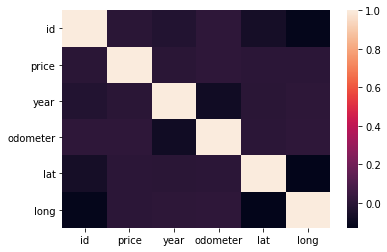

In [61]:
#heatmap for all features
ax = plt.axes()
sns.heatmap(correlation)
plt.show()

None of the numerical features are correlated or have a linear relationship with the target variable price. hence a linear regression model will not work here

In [62]:
gc.collect()

22

#### Checking for outliers in price and odometer column

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


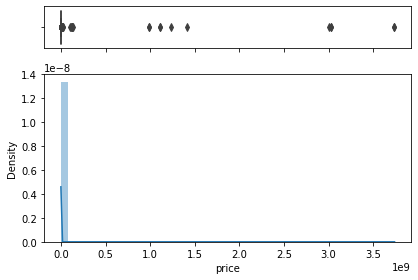

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


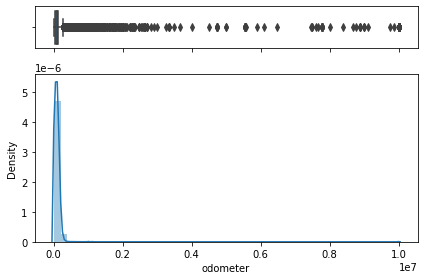

In [63]:
for col in ['price','odometer']:
    # set 2 subplots and set ratio of plots 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.20, .80)
                                        })   
    g1 = sns.boxplot(col, ax=ax_box, data=df) # boxplot
    g1.set(xlabel=None) # remove x axis label for boxplot
    g2 = sns.distplot(df[col], ax=ax_hist) # distribution plot 
    plt.tight_layout()
    plt.show()

In [64]:
# since price value can't be 0, remove the rows with price of 0
df = df[df['price']>0]

In [65]:
# removing outliers from the price column using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-23885.0 58475.0


### values below the lower bound and values above the upper bound are considered outliers

In [66]:
outliers = df[(df.price < lower_bound) | (df.price > upper_bound)]

In [67]:
#dataframe with price outliers dropped
df = df.drop(outliers.index)

<AxesSubplot:xlabel='price'>

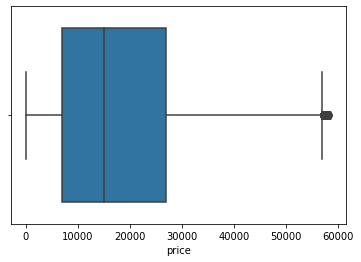

In [68]:
# boxplot after removing outliers in price column
sns.boxplot(x = df['price'])

In [69]:
gc.collect()

9275

In [70]:
# removing outliers from the odometer column using IQR
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-104875.0 280525.0


In [71]:
outliers = df[(df.odometer < lower_bound) | (df.odometer > upper_bound)]

In [72]:
df = df.drop(outliers.index)

<AxesSubplot:xlabel='odometer'>

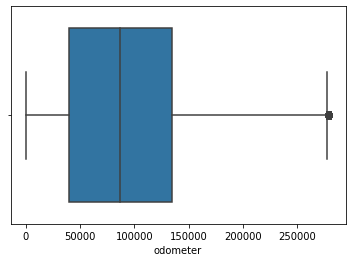

In [73]:
# boxplot after removing outliers in odometer column
sns.boxplot(x = df['odometer'])

In [74]:
gc.collect()

22

In [75]:
df.describe()

,id,price,year,odometer,lat,long
count,3.824210e+05,382421.000000,382421.000000,382421.000000,382421.000000,382421.000000
mean,7.311477e+09,17844.465293,2010.965005,91826.186334,38.501493,-94.136018
std,4.475106e+06,12816.154723,16.069363,60705.832216,5.834980,18.124898
min,7.207408e+09,1.000000,0.000000,0.000000,-81.838232,-159.827728
25%,7.308118e+09,7000.000000,2008.000000,39293.000000,34.720000,-110.874757
50%,7.312616e+09,14995.000000,2013.000000,87051.000000,39.222701,-87.838870
75%,7.315248e+09,26990.000000,2017.000000,134431.000000,42.358190,-80.668700
max,7.317101e+09,58448.000000,2022.000000,280463.000000,82.390818,167.629911


### selecting the final dataset to work with by dropping columns not needed for model building

In [76]:
#dropping some columns
df.drop(columns=['id','url','region_url','condition','VIN','description','image_url','size','lat','long','posting_date'],inplace=True)

In [77]:
# loading the final data set
df

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,2010.0,ford,f-150,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az
1,fayetteville,11900,2017.0,hyundai,f-150,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar
2,florida keys,21000,2005.0,ford,f-150,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl
3,worcester / central MA,1500,2002.0,honda,f-150,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ma
4,greensboro,4900,1965.0,chevrolet,f-150,6 cylinders,gas,85548.0,clean,automatic,4wd,truck,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382421 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        382421 non-null  object 
 1   price         382421 non-null  int64  
 2   year          382421 non-null  float64
 3   manufacturer  382421 non-null  object 
 4   model         382421 non-null  object 
 5   cylinders     382421 non-null  object 
 6   fuel          382421 non-null  object 
 7   odometer      382421 non-null  float64
 8   title_status  382421 non-null  object 
 9   transmission  382421 non-null  object 
 10  drive         382421 non-null  object 
 11  type          382421 non-null  object 
 12  paint_color   382421 non-null  object 
 13  state         382421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 43.8+ MB


In [79]:
gc.collect()

22

### **Using Label Encoder to convert categorical values to numbers** 

In [80]:
#selecting categorical features
cat_feat = df.select_dtypes(exclude = np.number).columns 
cat_feat

Index(['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [81]:
# label encode categorical features 
for col in cat_feat:   
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [82]:
df.sample(5)

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
321009,259,22990,2001.0,34,12907,5,2,116346.0,0,0,0,8,8,37
413182,398,37999,2017.0,13,13885,5,2,20834.0,0,0,0,11,0,47
304673,254,3500,1983.0,14,25503,6,2,100000.0,0,0,0,12,10,36
386602,344,6750,2006.0,23,15813,5,2,151000.0,0,0,1,9,8,44
94320,120,9500,1991.0,7,8774,5,2,128000.0,0,0,2,2,8,9


In [83]:
gc.collect()

88

### Building Models

In [84]:
#selecting Features
x = df.drop("price",1)
#selecting target Variable
y = df["price"]          

In [85]:
x

,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,277,2010.0,13,12907,5,2,85548.0,0,0,0,9,10,3
1,105,2017.0,17,12907,5,2,85548.0,0,0,0,9,10,2
2,111,2005.0,13,12907,5,2,85548.0,0,0,0,9,10,9
3,396,2002.0,16,12907,5,2,85548.0,0,0,0,9,10,19
4,131,1965.0,7,12907,5,2,85548.0,0,0,0,11,10,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,2019.0,31,17889,5,2,32226.0,0,2,1,9,10,50
426876,397,2020.0,41,21475,5,2,12029.0,0,2,1,9,8,50
426877,397,2020.0,6,26630,5,0,4174.0,0,2,0,4,10,50
426878,397,2018.0,23,12239,5,2,30112.0,0,2,1,9,9,50


In [86]:
y

0          6000
1         11900
2         21000
3          1500
4          4900
          ...  
426875    23590
426876    30590
426877    34990
426878    28990
426879    30590
Name: price, Length: 382421, dtype: int64

In [87]:
# normalize the data
x = StandardScaler().fit_transform(x.astype(float))

In [88]:
#create and split train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (305936, 13) (305936,)
Test set:  (76485, 13) (76485,)


In [90]:
x_train

array([[ 0.8671553 ,  0.37555959,  1.40680622, ..., -1.74388415,
         0.77011887,  0.88955036],
       [-0.07450461, -0.12228283,  0.37236689, ...,  0.56282539,
        -1.73588112,  0.55885276],
       [-1.4233688 , -0.06005252,  1.75161933, ...,  0.30652433,
         0.51951888,  0.88955036],
       ...,
       [ 1.66459703, -0.06005252,  1.06199311, ...,  0.56282539,
        -0.48288112, -0.49937958],
       [-1.36398485,  0.4377899 , -0.74827572, ...,  1.33172857,
         0.51951888, -0.69779814],
       [ 1.68156388,  0.25109899,  1.92402588, ...,  0.56282539,
         0.77011887,  0.95568988]])

### Random Forest

In [91]:
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(x_train, y_train.ravel())

RandomForestRegressor(n_estimators=150, random_state=42)

In [92]:
gc.collect()

46

In [93]:
y_pred = rf.predict(x_test)

In [94]:
gc.collect()

46

### Extra Trees Model

In [95]:
#calling and fitting model 
ET = ExtraTreesRegressor(n_estimators=400, random_state=42)
ET.fit(x_train, y_train.ravel())

ExtraTreesRegressor(n_estimators=400, random_state=42)

In [96]:
gc.collect()

46

In [97]:
y_predET = ET.predict(x_test)

In [98]:
gc.collect()

46

### Model Evaluation

The models are evaluated based on the following metrics 

MAE- Mean Absolute Error

MSE- Mean Squared Error

RMSE- Root Mean Squared Error

R2 Score

#### Evaluating Random Forest Model

In [99]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 2))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 2))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print('R2 score: ', round(r2_score(y_test, y_pred), 2))

Mean Absolute Error:  2110.87
Mean Squared Error:  18064637.7
Root Mean Squared Error:  4250.25
R2 score:  0.89


In [100]:
gc.collect()

44

#### Evaluating Extra Trees Model

In [101]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predET), 2))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predET), 2))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 2))
print('R2 score: ', round(r2_score(y_test, y_predET), 2))

Mean Absolute Error:  1948.26
Mean Squared Error:  17632025.0
Root Mean Squared Error:  4199.05
R2 score:  0.89


In [102]:
gc.collect()

44

## Model Comparison

In [103]:
Models_list = ['Random Forest ', 'Extra Trees']

Score_list = [round(r2_score(y_test, y_pred), 2), round(r2_score(y_test, y_predET), 2)]

MSE_list = [round(metrics.mean_squared_error(y_test, y_pred), 2),round(metrics.mean_squared_error(y_test, y_predET), 2)]

MAE_list = [round(metrics.mean_absolute_error(y_test, y_pred), 2),round(metrics.mean_absolute_error(y_test, y_predET), 2)]
RMSE_list=[round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2),round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 2)]

In [104]:
# The models are put in a dataframe with their respective scores
dict_of_lists = {"Model":Models_list,
               "R2 Score":Score_list,
               "MSE":MSE_list,
               "MAE":MAE_list,
                "RMSE":RMSE_list}

models= pd.DataFrame(dict_of_lists)

models

,Model,R2 Score,MSE,MAE,RMSE
0,Random Forest,0.89,18064637.7,2110.87,4250.25
1,Extra Trees,0.89,17632025.0,1948.26,4199.05


### CONCLUSION

With a lower RMSE value 4199.05 and MAE value 2110.87, the Extra Trees Regressor performed best in predicting the prices of used cars